In [2]:
words_withoutsplitline=open('names.txt','r').read()
words_withoutsplitline[:20]

'emma\nolivia\nava\nisab'

In [3]:
words=open('names.txt','r').read().splitlines()
len(words)

32033

Here we create a list data type namely **words**. We open the text file, splitline command converts the existing words into a list entries.

We will now work with `Bigrams` - two consecutive characters from a string of tokens. Our aim is to create a model that can generate words and the way of doing it here will be predicting the next character of name by looking at its previous entry. One way to go about this is to iterate over all names in **words**, study the bigrams and keep a track of how many times a certain alphabet follows the other. 

Given 3 names - RAJ, ROHIT, SARA

We have the following info --> Most names (in this tiny dataset) start with R. 

bigrams for 1 - RA,AJ

bigrams for 2 - RO,OH,HI,IT

bigrams for 3 - SA,AR,RA

Let us now count the follow score -

We write all charaters that have a follower in bigram list and count how many times that happen. Next we add no. of followers to see how many times a letter is followed.

* A- 1J,1R  -- 2
* H - 1I  -- 1
* I - 1T  -- 1
* O- 1H  -- 1
* R- 2A, 1O  -- 3
* S - 1A  -- 1




In [4]:
b_dict={} #dictionary of bigrams with key as bigram and value as no of times they occur
for w in words:
 # chs = '<s>' + list(w) + '<e>' #why is this errorneous? you cannot add character to list type!!
  chs = ['<s>'] + list(w) +['<e>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram=(ch1,ch2)
    b_dict[bigram]=b_dict.get(bigram,0)+1 
#get method is used so that in case of absense we get numerical value of zero which other wise is by default  'none'
# we update the value each time we recieve the same pair of chars i.e same bigram
 

We will need to keep count of all bigrams that occur and then analyse the patterns that emerge.

In [5]:
b_dict.items() #returns a tuple of tuple (key,value)<--((ch1,ch2), count)


dict_items([(('<s>', 'e'), 1531), (('e', 'm'), 769), (('m', 'm'), 168), (('m', 'a'), 2590), (('a', '<e>'), 6640), (('<s>', 'o'), 394), (('o', 'l'), 619), (('l', 'i'), 2480), (('i', 'v'), 269), (('v', 'i'), 911), (('i', 'a'), 2445), (('<s>', 'a'), 4410), (('a', 'v'), 834), (('v', 'a'), 642), (('<s>', 'i'), 591), (('i', 's'), 1316), (('s', 'a'), 1201), (('a', 'b'), 541), (('b', 'e'), 655), (('e', 'l'), 3248), (('l', 'l'), 1345), (('l', 'a'), 2623), (('<s>', 's'), 2055), (('s', 'o'), 531), (('o', 'p'), 95), (('p', 'h'), 204), (('h', 'i'), 729), (('<s>', 'c'), 1542), (('c', 'h'), 664), (('h', 'a'), 2244), (('a', 'r'), 3264), (('r', 'l'), 413), (('l', 'o'), 692), (('o', 't'), 118), (('t', 't'), 374), (('t', 'e'), 716), (('e', '<e>'), 3983), (('<s>', 'm'), 2538), (('m', 'i'), 1256), (('a', 'm'), 1634), (('m', 'e'), 818), (('<s>', 'h'), 874), (('r', 'p'), 14), (('p', 'e'), 197), (('e', 'r'), 1958), (('r', '<e>'), 1377), (('e', 'v'), 463), (('v', 'e'), 568), (('l', 'y'), 1588), (('y', 'n'), 18

In [6]:
sorted(b_dict.items(), key = lambda kv:kv[1]) 

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

sorted function returns ascending list. `sorted(variable, key = some **function**)`, key accepts function declaration. The input variable to function is not ex[licitly defined by the user rather that function accepts the item of list/tuple passed to `sorted`



In [7]:
import torch
import matplotlib.pyplot as plt

In [8]:
N=torch.zeros((28,28), dtype=torch.int32)

In [9]:
char_list=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(char_list)} #enumerate returns (index, entry)
stoi['<s>']=26
stoi['<e>']=27

In [10]:

for w in words:
  chs = ['<s>'] + list(w) +['<e>']
  for ch1, ch2 in zip(chs, chs[1:]):
    i1=stoi[ch1]
    i2=stoi[ch2]
    N[i1,i2]+=1

In [11]:
N

tensor([[ 556,  541,  470, 1042,  692,  134,  168, 2332, 1650,  175,  568, 2528,
         1634, 5438,   63,   82,   60, 3264, 1118,  687,  381,  834,  161,  182,
         2050,  435,    0, 6640],
        [ 321,   38,    1,   65,  655,    0,    0,   41,  217,    1,    0,  103,
            0,    4,  105,    0,    0,  842,    8,    2,   45,    0,    0,    0,
           83,    0,    0,  114],
        [ 815,    0,   42,    1,  551,    0,    2,  664,  271,    3,  316,  116,
            0,    0,  380,    1,   11,   76,    5,   35,   35,    0,    0,    3,
          104,    4,    0,   97],
        [1303,    1,    3,  149, 1283,    5,   25,  118,  674,    9,    3,   60,
           30,   31,  378,    0,    1,  424,   29,    4,   92,   17,   23,    0,
          317,    1,    0,  516],
        [ 679,  121,  153,  384, 1271,   82,  125,  152,  818,   55,  178, 3248,
          769, 2675,  269,   83,   14, 1958,  861,  580,   69,  463,   50,  132,
         1070,  181,    0, 3983],
        [ 242,    0,

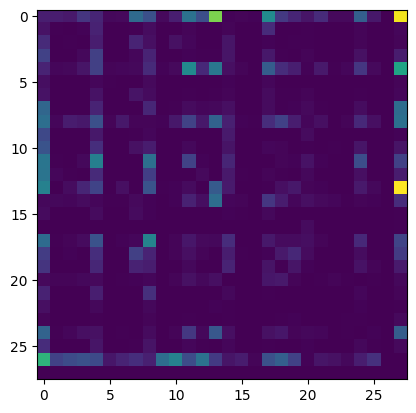

In [12]:
plt.imshow(N)#prints img array for the 2d array N

In [13]:
itos= {i:s for i, s in enumerate(char_list)}
itos[26]='<s>'
itos[27]='<e>'
itos

{0: 'a',
 1: 'b',
 2: 'c',
 3: 'd',
 4: 'e',
 5: 'f',
 6: 'g',
 7: 'h',
 8: 'i',
 9: 'j',
 10: 'k',
 11: 'l',
 12: 'm',
 13: 'n',
 14: 'o',
 15: 'p',
 16: 'q',
 17: 'r',
 18: 's',
 19: 't',
 20: 'u',
 21: 'v',
 22: 'w',
 23: 'x',
 24: 'y',
 25: 'z',
 26: '<s>',
 27: '<e>'}

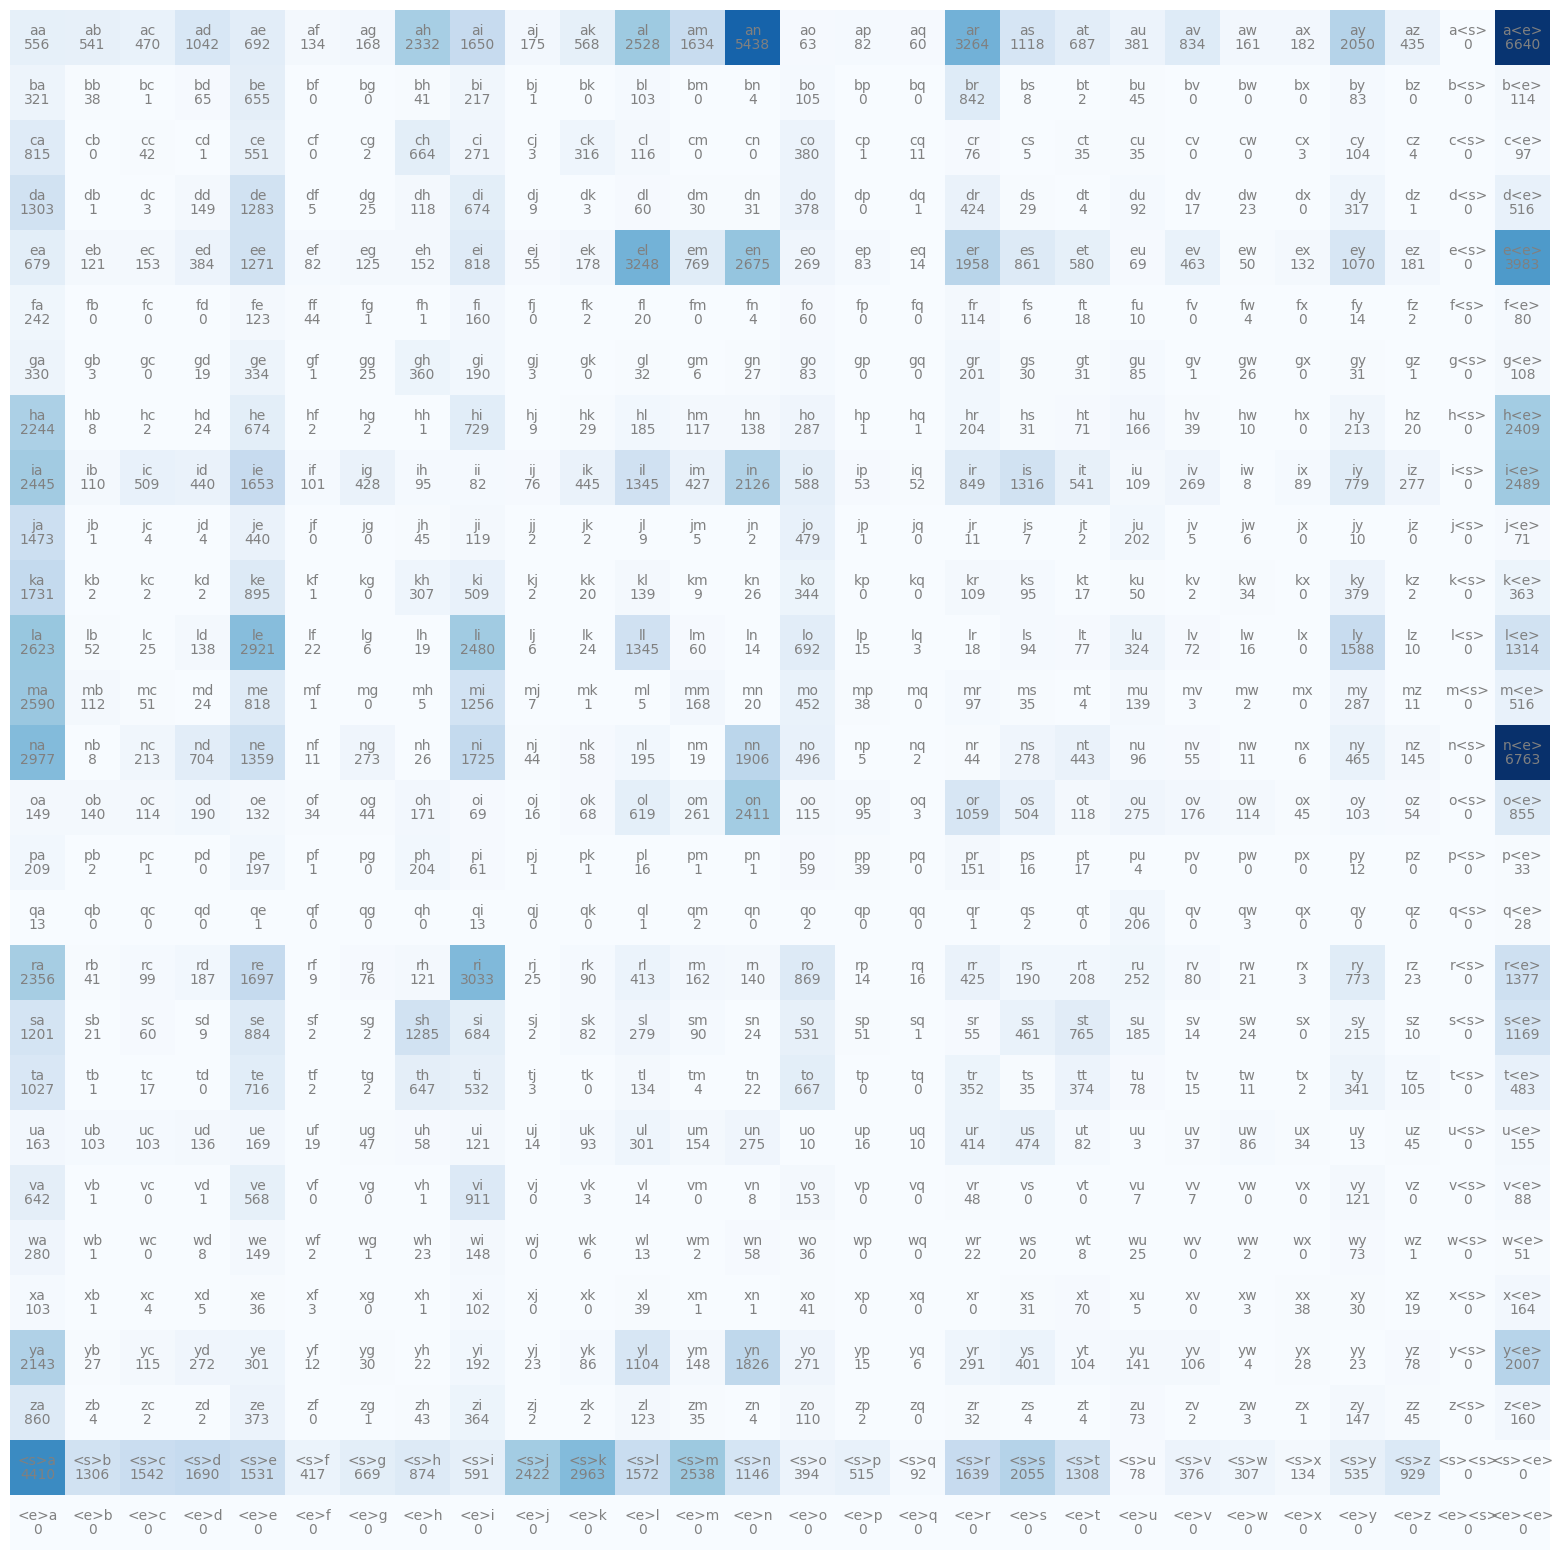

In [14]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='Blues')
for i in range(28):
  for j in range(28):
   chstr = itos[i] + itos[j]
   plt.text(j,i,chstr, ha="center", va ="bottom", color ="gray")
   plt.text(j,i,N[i,j].item(),ha="center", va ="top", color ="gray")
plt.axis('off');

There's nothing special about `<s>` or `<e>` as such. We can even use a single token which will computationally save us some space and make things bit clearer.

In [15]:
char_list=sorted(list(set(''.join(words))))
stoi={s:i+1 for i,s in enumerate(char_list)} #enumerate returns (index, entry)
stoi['<.>']=0
N=torch.zeros((27,27), dtype=torch.int32)
for w in words:
  chs = ['<.>'] + list(w) +['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    i1=stoi[ch1]
    i2=stoi[ch2]
    N[i1,i2]+=1

itos= {i:s for s, i in stoi.items()}

itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '<.>'}

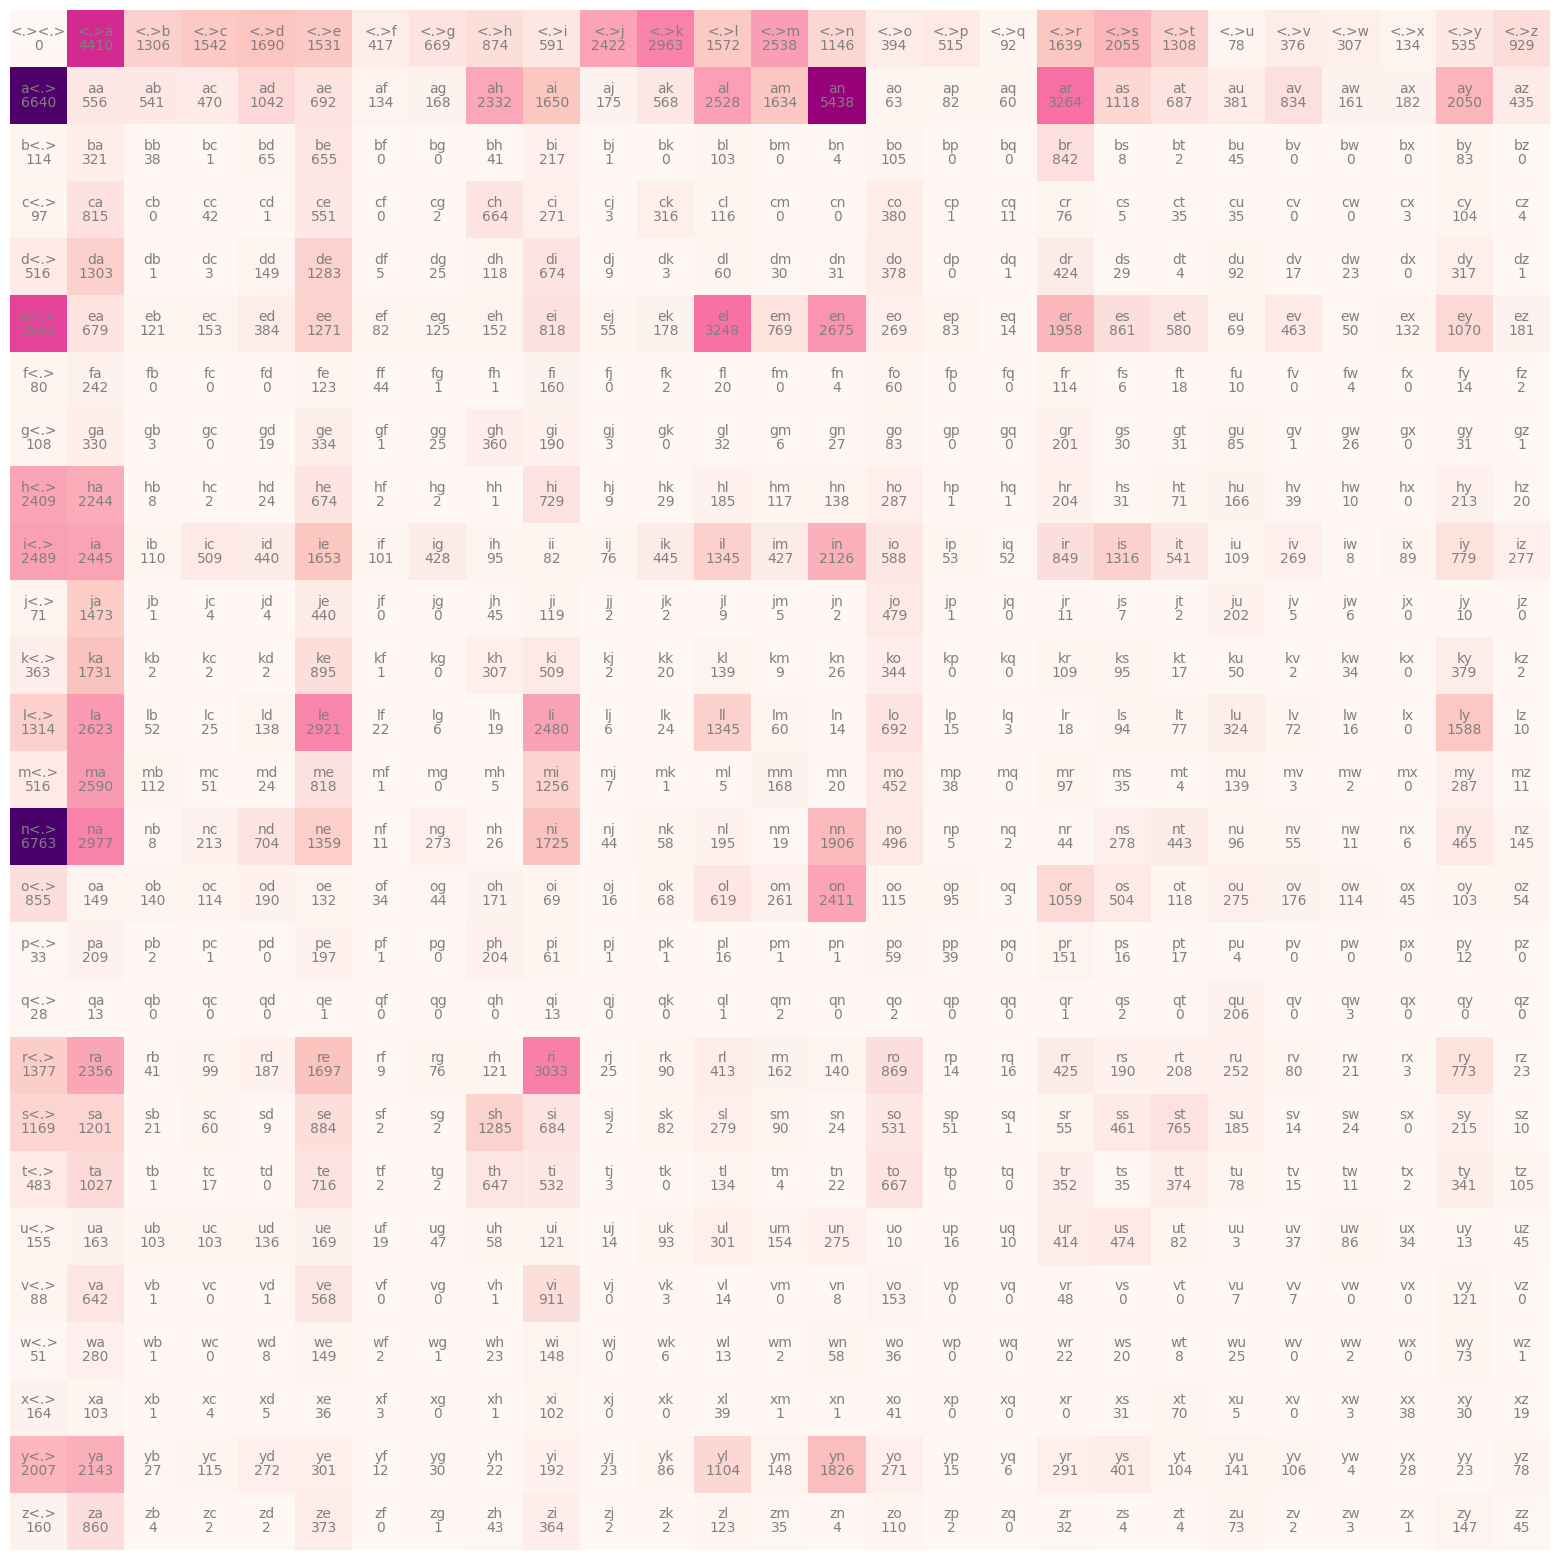

In [16]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.imshow(N, cmap='RdPu')
for i in range(27):
  for j in range(27):
   chstr = itos[i] + itos[j]
   plt.text(j,i,chstr, ha="center", va ="bottom", color ="gray")
   plt.text(j,i,N[i,j].item(),ha="center", va ="top", color ="gray")
plt.axis('off');
#counts_array

In [17]:
N[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [18]:
p=N[0].float()
p

tensor([   0., 4410., 1306., 1542., 1690., 1531.,  417.,  669.,  874.,  591.,
        2422., 2963., 1572., 2538., 1146.,  394.,  515.,   92., 1639., 2055.,
        1308.,   78.,  376.,  307.,  134.,  535.,  929.])

In [19]:
p=p/sum(p)
p #normalised probability vector

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [20]:
g= torch.Generator().manual_seed(2147483647)
ix=0
for i in  range(50):
 out=[]
 while True:
  p=N[ix].float()#N[0] row prob
  p=p/sum(p)
  #print(p)
  ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
  out.append(itos[ix])
  if ix==0:
    break
 print(''.join(out))
   


mor<.>
axx<.>
minaymoryles<.>
kondlaisah<.>
anchshizarie<.>
odaren<.>
iaddash<.>
h<.>
jhinatien<.>
egushl<.>
h<.>
br<.>
a<.>
jayn<.>
ilemannariaenien<.>
be<.>
f<.>
akiinela<.>
trttanakeroruceyaaxatona<.>
lamoynayrkiedengin<.>
torrederahnn<.>
ellovyllobrpin<.>
a<.>
wai<.>
kn<.>
jaieendenelele<.>
kianu<.>
eryly<.>
zeeieil<.>
kayvirgiynenn<.>
r<.>
t<.>
rja<.>
kronanurolin<.>
din<.>
elfr<.>
dikie<.>
s<.>
elarieiavelvalllaish<.>
eythann<.>
janianaeri<.>
ble<.>
ckiree<.>
l<.>
adgenoena<.>
naisaryan<.>
sialaitalyee<.>
cena<.>
lisarr<.>
bizyngor<.>


In [21]:
P= torch.zeros((27,27), dtype=torch.float32)
for j in range(27):
 q=N[j].float()
 q=q/sum(q)
 #print(q.sum())
 P[j]=q

In [22]:
P #defining a tensor of probabilities of bigrams, each row define a prob list!

tensor([[0.0000e+00, 1.3767e-01, 4.0770e-02, 4.8138e-02, 5.2758e-02, 4.7794e-02,
         1.3018e-02, 2.0885e-02, 2.7284e-02, 1.8450e-02, 7.5610e-02, 9.2498e-02,
         4.9074e-02, 7.9231e-02, 3.5776e-02, 1.2300e-02, 1.6077e-02, 2.8720e-03,
         5.1166e-02, 6.4153e-02, 4.0833e-02, 2.4350e-03, 1.1738e-02, 9.5839e-03,
         4.1832e-03, 1.6702e-02, 2.9001e-02],
        [1.9596e-01, 1.6408e-02, 1.5966e-02, 1.3870e-02, 3.0751e-02, 2.0422e-02,
         3.9546e-03, 4.9579e-03, 6.8821e-02, 4.8694e-02, 5.1645e-03, 1.6763e-02,
         7.4605e-02, 4.8222e-02, 1.6048e-01, 1.8592e-03, 2.4199e-03, 1.7707e-03,
         9.6326e-02, 3.2994e-02, 2.0274e-02, 1.1244e-02, 2.4613e-02, 4.7514e-03,
         5.3711e-03, 6.0499e-02, 1.2838e-02],
        [4.3100e-02, 1.2136e-01, 1.4367e-02, 3.7807e-04, 2.4575e-02, 2.4764e-01,
         0.0000e+00, 0.0000e+00, 1.5501e-02, 8.2042e-02, 3.7807e-04, 0.0000e+00,
         3.8941e-02, 0.0000e+00, 1.5123e-03, 3.9698e-02, 0.0000e+00, 0.0000e+00,
         3.1834e-

An efficient way is to store the probability distribution of each row as a tensor instead of recalculating it everytime!

In [23]:
g= torch.Generator().manual_seed(2147483647)
ix=0
for i in  range(25): ##25 word generator
 out=[]
 while True:
  p=P[ix]
  #print(p)
  ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
  out.append(itos[ix])
  if ix==0:
    break
 print(''.join(out))

mor<.>
axx<.>
minaymoryles<.>
kondlaisah<.>
anchshizarie<.>
odaren<.>
iaddash<.>
h<.>
jhinatien<.>
egushl<.>
h<.>
br<.>
a<.>
jayn<.>
ilemannariaenien<.>
be<.>
f<.>
akiinela<.>
trttanakeroruceyaaxatona<.>
lamoynayrkiedengin<.>
torrederahnn<.>
ellovyllobrpin<.>
a<.>
wai<.>
kn<.>


We will now try to understand the use of `torch.sum`
torch.sum`(tensor,dim,keepdim=True/False,dtype)`



* **tensor** - this is the tensor under consideration
*   **dim** - this is the dimension of tensor along which we want to perform summation -- say we have (3,3,3) as a tensor element then 0 stands for dimension 1, 1 stands for dimension 2 and so on. 


*   **keepdim** - If set to True it retains the actual shape of tensor except that specific dimension, i.e. it squeezes the selected dimension. Eg: We have a 20X21X35 tensor. `torch.sum(, 2, keepdim=True)` will return a 20X21X1 tensor summing elements of 3rd dimension while keeping no of elements along 3rd dimension constant. However, if `keepdim=False`, we get 20X21 tensor, wherein that dimension loses all its existence!





In [24]:
#Yet another way to be efficient. Using concept of tensors.
#broadcasting in division (27,27)/(27,1)--> (27,27)/(27,27)
Q=N.float()
Q/=Q.sum(1,keepdim=True)
Q
g= torch.Generator().manual_seed(2147483647)
ix=0
for i in  range(25): ##25 word generator
 out=[]
 while True:
  p=Q[ix]
  #print(p)
  ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
  out.append(itos[ix])
  if ix==0:
    break
 print(''.join(out))

mor<.>
axx<.>
minaymoryles<.>
kondlaisah<.>
anchshizarie<.>
odaren<.>
iaddash<.>
h<.>
jhinatien<.>
egushl<.>
h<.>
br<.>
a<.>
jayn<.>
ilemannariaenien<.>
be<.>
f<.>
akiinela<.>
trttanakeroruceyaaxatona<.>
lamoynayrkiedengin<.>
torrederahnn<.>
ellovyllobrpin<.>
a<.>
wai<.>
kn<.>


In [25]:
Q.shape

torch.Size([27, 27])

At this juncture after bighram modelling we need to ask ourseleves has the model learnt anything significant? The way to evaluate this empirically is to see what probabilities the model associates with 'bigrams' of names from the dataset.

If the model is close to a random string generator each pair should occur with almost equal probability. However, if the model understands what 'names' are from the dataset, bigrams from original name should have higher probabilities.

We will print probability of each bigram for names from the dataset.

Likelihood - The likelihood describes the extent to which the sample provides support for any particular parameter value. Here for neural net our parameter is weight matrix. We need to find the matrix for which the given dataset has maximum likelihood.
Likelihood = `Prob((xs,ys)|W=W0)` 
Since occurence each bigram is independent of each other

 `Prob((xs,ys)|W=W0)` = Prob((x1,y1)|W=W0)xProb((x2,y2)|W=W0)x

In [26]:
log_likelihood=0.0
count=0
for w in words[:3]:
  chs = ['<.>'] + list(w) +['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    i1=stoi[ch1]
    i2=stoi[ch2]
    prob=Q[i1,i2]
    log_prob=torch.log(prob)
    print(f'{ch1,ch2}:{prob:0.4f}')
    log_likelihood +=log_prob
    nll=-log_likelihood
    count+=1
    N[i1,i2]+=1
print(f'normalised negative log likelihood is :{nll/count}')

('<.>', 'e'):0.0478
('e', 'm'):0.0377
('m', 'm'):0.0253
('m', 'a'):0.3899
('a', '<.>'):0.1960
('<.>', 'o'):0.0123
('o', 'l'):0.0780
('l', 'i'):0.1777
('i', 'v'):0.0152
('v', 'i'):0.3541
('i', 'a'):0.1381
('a', '<.>'):0.1960
('<.>', 'a'):0.1377
('a', 'v'):0.0246
('v', 'a'):0.2495
('a', '<.>'):0.1960
normalised negative log likelihood is :2.424102306365967


We see here the probabilities of each pair are not constant and rather skewed which indicates that the model has some knowledge that can indicate that this is not a randomly generated bigram. (random bigrams shall have probability ~1.3%)

We are now slowly transitioning to concept of *loss function*. We define **-ve log likelihood as our function and normalise it**.  Likelihood is product of individual probablities. log simply magnifies the product for better analysis and brings with itself additive property. 

we take negative so that the function fit our understanding of loss function. If probability product approaches one (i.e likelihood increases), *-ve log approaches 0.*

We will now try to convert this bigram model into a neuralnet and see if we can improve on things. Till now we have been working around with plain statistic without any optimisation. Neuralnet will utilise the idea of loss function and try to reduce it. Iterations will allow us to properly analyse the full potential of bigram modelling and the best we can achieve using it.

To create a neuralnet, we will require a dataset, i.e. collection of feature and respective label vectors in tensor form.

In [27]:
#creating a dataset
#bigram generator. We will put these biagrams into feature,label form
#feature - bigram.first, label - letter that follows
xs=[]
ys=[]
for w in words:
  chs = ['<.>'] + list(w) +['<.>']
  for ch1, ch2 in zip(chs, chs[1:]):
    i1=stoi[ch1]
    i2=stoi[ch2] #stoi returns value as no.
    xs.append(i1)
    ys.append(i2)
    N[i1,i2]+=1

In [28]:
print(xs)
xs=torch.tensor(xs) #converting list to tensor

[0, 5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1, 2, 5, 12, 12, 1, 0, 19, 15, 16, 8, 9, 1, 0, 3, 8, 1, 18, 12, 15, 20, 20, 5, 0, 13, 9, 1, 0, 1, 13, 5, 12, 9, 1, 0, 8, 1, 18, 16, 5, 18, 0, 5, 22, 5, 12, 25, 14, 0, 1, 2, 9, 7, 1, 9, 12, 0, 5, 13, 9, 12, 25, 0, 5, 12, 9, 26, 1, 2, 5, 20, 8, 0, 13, 9, 12, 1, 0, 5, 12, 12, 1, 0, 1, 22, 5, 18, 25, 0, 19, 15, 6, 9, 1, 0, 3, 1, 13, 9, 12, 1, 0, 1, 18, 9, 1, 0, 19, 3, 1, 18, 12, 5, 20, 20, 0, 22, 9, 3, 20, 15, 18, 9, 1, 0, 13, 1, 4, 9, 19, 15, 14, 0, 12, 21, 14, 1, 0, 7, 18, 1, 3, 5, 0, 3, 8, 12, 15, 5, 0, 16, 5, 14, 5, 12, 15, 16, 5, 0, 12, 1, 25, 12, 1, 0, 18, 9, 12, 5, 25, 0, 26, 15, 5, 25, 0, 14, 15, 18, 1, 0, 12, 9, 12, 25, 0, 5, 12, 5, 1, 14, 15, 18, 0, 8, 1, 14, 14, 1, 8, 0, 12, 9, 12, 12, 9, 1, 14, 0, 1, 4, 4, 9, 19, 15, 14, 0, 1, 21, 2, 18, 5, 25, 0, 5, 12, 12, 9, 5, 0, 19, 20, 5, 12, 12, 1, 0, 14, 1, 20, 1, 12, 9, 5, 0, 26, 15, 5, 0, 12, 5, 1, 8, 0, 8, 1, 26, 5, 12, 0, 22, 9, 15, 12, 5, 20, 0, 1, 21, 18, 15, 18, 1, 

In [29]:
print(ys)
ys=torch.tensor(ys) #converting list to tensor

[5, 13, 13, 1, 0, 15, 12, 9, 22, 9, 1, 0, 1, 22, 1, 0, 9, 19, 1, 2, 5, 12, 12, 1, 0, 19, 15, 16, 8, 9, 1, 0, 3, 8, 1, 18, 12, 15, 20, 20, 5, 0, 13, 9, 1, 0, 1, 13, 5, 12, 9, 1, 0, 8, 1, 18, 16, 5, 18, 0, 5, 22, 5, 12, 25, 14, 0, 1, 2, 9, 7, 1, 9, 12, 0, 5, 13, 9, 12, 25, 0, 5, 12, 9, 26, 1, 2, 5, 20, 8, 0, 13, 9, 12, 1, 0, 5, 12, 12, 1, 0, 1, 22, 5, 18, 25, 0, 19, 15, 6, 9, 1, 0, 3, 1, 13, 9, 12, 1, 0, 1, 18, 9, 1, 0, 19, 3, 1, 18, 12, 5, 20, 20, 0, 22, 9, 3, 20, 15, 18, 9, 1, 0, 13, 1, 4, 9, 19, 15, 14, 0, 12, 21, 14, 1, 0, 7, 18, 1, 3, 5, 0, 3, 8, 12, 15, 5, 0, 16, 5, 14, 5, 12, 15, 16, 5, 0, 12, 1, 25, 12, 1, 0, 18, 9, 12, 5, 25, 0, 26, 15, 5, 25, 0, 14, 15, 18, 1, 0, 12, 9, 12, 25, 0, 5, 12, 5, 1, 14, 15, 18, 0, 8, 1, 14, 14, 1, 8, 0, 12, 9, 12, 12, 9, 1, 14, 0, 1, 4, 4, 9, 19, 15, 14, 0, 1, 21, 2, 18, 5, 25, 0, 5, 12, 12, 9, 5, 0, 19, 20, 5, 12, 12, 1, 0, 14, 1, 20, 1, 12, 9, 5, 0, 26, 15, 5, 0, 12, 5, 1, 8, 0, 8, 1, 26, 5, 12, 0, 22, 9, 15, 12, 5, 20, 0, 1, 21, 18, 15, 18, 1, 0, 

In [30]:
#casting into tensor with dtype=float
import torch.nn.functional as nn_f
xenc=nn_f.one_hot(xs,num_classes=27).float() #input to network: one_hot encoding
yenc=nn_f.one_hot(ys,num_classes=27).float()
xenc.shape

torch.Size([228146, 27])

In [31]:
#g= torch.Generator().manual_seed(2147483647) <- previously defined.
W=torch.randn((27,27),generator=g, requires_grad=True)


We now create a weight matrix that will be used to update feature labels and give some output that can be correlated to probabilities of what letter will follow.

for eg. - Say we have input tensor will be one_hot form of  as `(2,6)` dim(2x27) i.e of given bigrams 1st bigram starts with **b** and 2nd starts with **f**. Weight matrix will be a square matrix of dimension 27x27 so that we obtain an output layer of 27 (2x27 tensor). Now, the output layer will be utilised to predict the next letter that might follow. After multiplication with W we will get 2 labels associated with 27 dim vector where each entry will loosely indicate what are the chances of that char following b.

Our aim the is to convert that 27 dim vector into a form that can be interpreted as probability.




In [32]:
logits=xenc@W #updation
logits 

tensor([[ 1.2910, -1.5094,  0.9438,  ..., -0.2417,  1.5490,  0.6835],
        [ 0.1336, -0.2391,  0.0875,  ..., -0.0997, -0.4050,  0.4570],
        [ 0.7253,  1.3637,  0.0557,  ...,  0.6480, -0.5180, -0.6849],
        ...,
        [-0.1880, -1.1001,  0.3373,  ..., -0.8386, -0.0911,  1.5157],
        [ 0.7979,  0.5962,  0.5232,  ...,  1.3985,  0.3302, -0.0123],
        [-0.1492, -2.9731,  1.1251,  ..., -0.3476,  0.6622,  0.2627]],
       grad_fn=<MmBackward0>)

As clearly visible the output layer of 1x27 contains seemingly random no. (including negatives). To interpret this as a probability array we need the following properties -


1.  Pull these numbers b/w (0,1)
2.  Since, more negative products essentially mean less correlation we require a way to quantify this.

1.  We also need to take care that transformations we use should be differiatble functions, because for optimisation will require backprop -> chain rule-> derivatives should be defined.

In a nutshell, we need to use some transformation that is differentiable, spits out positive numbers, register negative numbers are less probable(i.e close to 0) and finally normalise its output.


Best choice -> exponential fn

**`w1,w2,w3` --> `e^w1,e^w2,e^w3` --> `e^w1/s,e^w2/s,e^w3/s`**

wherein s= e^w1+e^w2+e^w3


SoftMax......triple BAM!!!



In [33]:
counts = logits.exp()
probs = counts / counts.sum(1,keepdims=True) #probabilities
print(probs.shape) #xenc-> probs
probs
loss=-probs[torch.arange(228146),ys].log().mean()#an attempt to read probs tensor.
loss

torch.Size([228146, 27])


tensor(3.7723, grad_fn=<NegBackward0>)

In [34]:
W.grad=None
loss.backward()
print(W.grad)

tensor([[ 1.0295e-02, -1.8704e-02,  1.5502e-03, -4.1430e-03, -2.6754e-03,
         -2.2218e-03,  2.1575e-03, -9.4148e-04, -2.5153e-03, -2.2440e-03,
         -8.4208e-03, -8.9951e-03,  4.6368e-03, -4.1690e-03, -3.7193e-03,
          8.2586e-03, -7.4165e-04,  2.1373e-03,  9.2521e-03, -6.1627e-03,
         -3.2111e-04,  9.3573e-04,  9.5964e-03,  3.0034e-03,  1.6354e-03,
          1.0982e-02,  1.5359e-03],
        [-2.3790e-02,  1.4840e-03,  1.1870e-02,  5.2725e-03,  1.6618e-02,
          8.6032e-04,  7.1933e-03,  4.3506e-04,  5.9976e-03, -5.0719e-03,
         -2.9857e-04,  1.4253e-03, -9.9173e-03, -6.8621e-03, -1.8937e-02,
          2.6235e-03,  5.2656e-04,  2.3648e-03, -1.2794e-02,  2.3868e-02,
          2.4212e-03, -2.8114e-04, -2.3238e-03,  1.1551e-03,  9.3763e-04,
         -7.0300e-03,  2.2559e-03],
        [ 4.0013e-04, -9.4907e-04, -1.2545e-04,  1.1564e-04,  4.4404e-05,
         -2.7106e-03,  1.1108e-04,  1.5451e-04,  6.3893e-05, -8.0863e-04,
          1.8450e-04,  9.9212e-04, -5.29

In [35]:
learning_rate=50
xenc = nn_f.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
for i in range(50):
  # forward pass
  
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(228146), ys].log().mean()+0.01*(W**2).mean() #ridge regularisation to prevent overfitting
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

3.782626152038574
3.3797340393066406
3.1521494388580322
3.0094833374023438
2.9116413593292236
2.841811180114746
2.7897064685821533
2.7495415210723877
2.7178235054016113
2.6923065185546875
2.6714508533477783
2.6541454792022705
2.6395695209503174
2.627120018005371
2.6163551807403564
2.606948137283325
2.5986523628234863
2.5912795066833496
2.584681987762451
2.5787415504455566
2.573364734649658
2.568474054336548
2.5640065670013428
2.5599098205566406
2.556140184402466
2.552659749984741
2.5494375228881836
2.54644513130188
2.5436604022979736
2.5410616397857666
2.5386319160461426
2.53635573387146
2.5342190265655518
2.532209873199463
2.530317783355713
2.5285332202911377
2.5268476009368896
2.5252530574798584
2.5237433910369873
2.5223121643066406
2.520953416824341
2.519663095474243
2.5184357166290283
2.5172677040100098
2.5161542892456055
2.5150928497314453
2.5140795707702637
2.5131120681762695
2.5121874809265137
2.511302947998047


In [36]:
probs.shape

torch.Size([228146, 27])

We end up with a tensor for 228146 characters mapped to a probability vector of dim 27. each column of this vector tells the chances of that 'index' entry to follow the letter from dataset we are at.

In [37]:
z=torch.tensor([3])
z

tensor([3])

In [38]:
g = torch.Generator().manual_seed(2147483647)
ix=0
for i in range(25):
  out=[]
  while True:
    xenc_1d =nn_f.one_hot(torch.tensor([ix]),num_classes=27).float() #1x27
    logits=xenc_1d @ W
    counts=logits.exp()
    p=counts/counts.sum(1, keepdims=True)#1x27
    ix=torch.multinomial(p,num_samples=1,replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix==0:
     break
  print(''.join(out))
    

mor<.>
axx<.>
minaymoryles<.>
kondn<.>
isah<.>
anchthizarie<.>
odaren<.>
iaddash<.>
h<.>
jionatien<.>
egwvhj<.>
ge<.>
t<.>
a<.>
jayn<.>
ilemannariaenien<.>
ad<.>
fa<.>
jmcima<.>
axrttanakerorvaeyaaxhonelan<.>
ksyonvrkiedengliavipulamlahmokallovxmisasskh<.>
a<.>
wai<.>
lole<.>
hahemenfkele<.>
